## В текущем проекте я разберу удобные методы визуализации данных на основе датасета Data Science Job Salaries.
- В качестве инструментов использую функционал библиотеки Matplotlib и надстройки Seaborn.

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import matplotlib.colors as mcl #доступ к широкому спектру цветов RGB/RGBA формата
from matplotlib.ticker import NullFormatter, FixedLocator, FixedFormatter

import pylab

In [2]:
#graphic style
plt.rcParams.update({'font.size': 14})

In [3]:
ds_salaries = pd.read_csv(r'/home/konstantin/Jupyter_Notebook/Зарплата в науке о данных/ds_salaries.csv')


In [4]:
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
ds_salaries.loc[ds_salaries['experience_level']=='EN', 'experience_level'] = 'Junior'
ds_salaries.loc[ds_salaries['experience_level']=='MI', 'experience_level'] = 'Middle'
ds_salaries.loc[ds_salaries['experience_level']=='SE', 'experience_level'] = 'Senior'
ds_salaries.loc[ds_salaries['experience_level']=='EX', 'experience_level'] = 'Experte'

ds_salaries.loc[ds_salaries['employment_type']=='PT', 'employment_type'] = 'Part_time'
ds_salaries.loc[ds_salaries['employment_type']=='FT', 'employment_type'] = 'Full_time'
ds_salaries.loc[ds_salaries['employment_type']=='CT', 'employment_type'] = 'Contract'
ds_salaries.loc[ds_salaries['employment_type']=='FL', 'employment_type'] = 'Freelance'

ds_salaries.loc[ds_salaries['company_size']=='S', 'company_size'] = 'Small' #employees < 50
ds_salaries.loc[ds_salaries['company_size']=='M', 'company_size'] = 'Medium' #employees < 250
ds_salaries.loc[ds_salaries['company_size']=='L', 'company_size'] = 'Large' # employees > 250

ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Middle,Full_time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior,Full_time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior,Full_time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Middle,Full_time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior,Full_time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


###### Проверка типа данных, пропущенных значений и повторов

In [5]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
ds_salaries.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
ds_salaries.duplicated().sum()

0

###### Первым делом нужно сформулировать запрос. Что мы хотим узнать? Изучив данные, у меня возникло желание узнать:


  1.Карьерные перспективы в DS?


  2.Какие специалисты нужны компаниям? 


Насколько данные коррелируют между собой? 

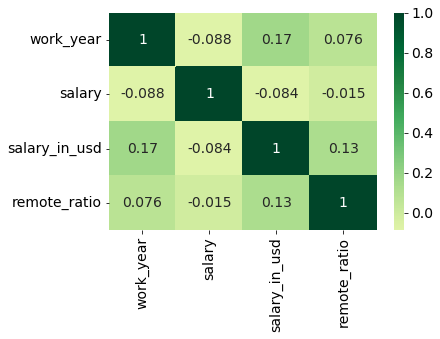

In [8]:
sns.heatmap(ds_salaries.drop(['Unnamed: 0'], axis = 1).corr(), cmap = 'YlGn', center =0.3, annot=True)

Между числовыми данными слабая корреляция

In [9]:
ds_salaries.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

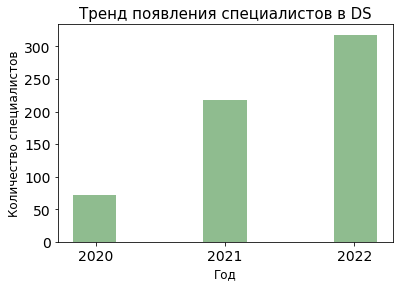

In [10]:
fig, ax = plt.subplots()
ds_salaries.work_year.hist(color = 'darkseagreen', density = 0, bins = 7)
plt.title('Тренд появления специалистов в DS', size=15)
plt.ylabel('Количество специалистов', size=12)
plt.xlabel('Год', size=12)

ax.grid(0)

ax.xaxis.set_major_locator(FixedLocator([2020.15, 2021, 2021.85]))
ax.xaxis.set_major_formatter(FixedFormatter(['2020', '2021', '2022']))

За последие несколько лет специалистов в области Data Science становится больше.

([<matplotlib.patches.Wedge at 0x7ff5ff387350>,
 [Text(0.13345983693376573, 1.0918738351685202, 'SE'),
  Text(-0.7183891320283002, -0.8330168395558553, 'MI'),
  Text(0.8236521438616164, -0.7291070880962296, 'EN'),
  Text(1.0900556489518896, -0.14757602172465184, 'EX')],
 [Text(0.07279627469114494, 0.5955675464555564, '46%'),
  Text(-0.39184861746998195, -0.454372821575921, '35%'),
  Text(0.44926480574269984, -0.3976947753252161, '14%'),
  Text(0.5945758085192124, -0.08049601184981008, '4%')])

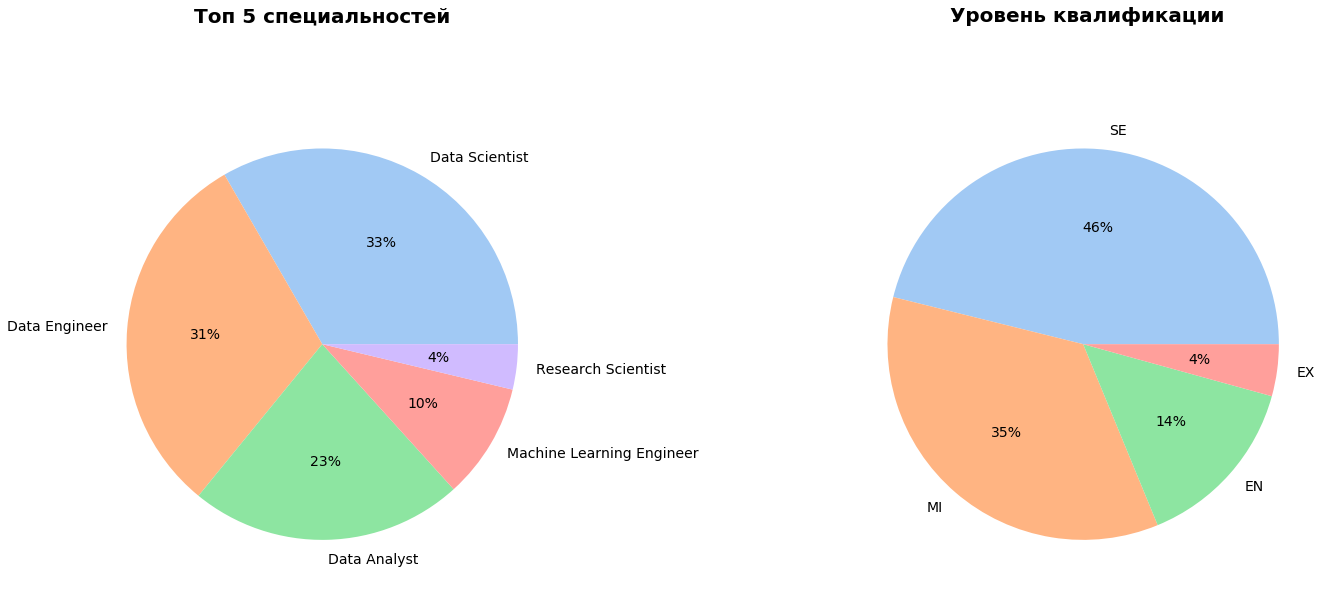

In [11]:

# Define the axes
f, ax =plt.subplots(1, 2, figsize=(25, 9))


#job_title


job = ds_salaries.job_title.value_counts()[:5]
plt.figtext(0.23, 1, 'Топ 5 специальностей', size=20, color='black', fontweight='bold')
label = [job.index[0],job.index[1], job.index[2], job.index[3], job.index[4]]
color = sns.color_palette('pastel')[0:5]

ax[0].pie(job, labels = label, colors = color, autopct='%.0f%%')

#experience_level

lvl = ds_salaries.experience_level.value_counts()
plt.figtext(0.65, 1, 'Уровень квалификации', size=20, color='black', fontweight='bold')
labels = [lvl.index[0],lvl.index[1], lvl.index[2], lvl.index[3]]
colors = sns.color_palette('pastel')[0:4]

ax[1].pie(lvl, labels = labels, colors = colors, autopct='%.0f%%')

- В профессии повляются новые кадры, а грейд специалистов повышается, из-за чего джунов в отрасли немного. 


- DS можно назвать динамично развивающейся сферой. 


- Большая часть специалистов занимаются поиском и обработкой информации. 


- Для старта в карьере можно обратить внимание на работу:

    
- Дата Саинтиста. Поиск, структурирование, обработка и презентация данных.


- Дата Инженера. Поиск и обработка данных, работа с моделями статистических предсказаний.


- Дата Аналитика. Большой упор на бизнес показатели и взаимдействие  заказчиком.

Text(0.5, 0, 'Годовой заработок в usd')

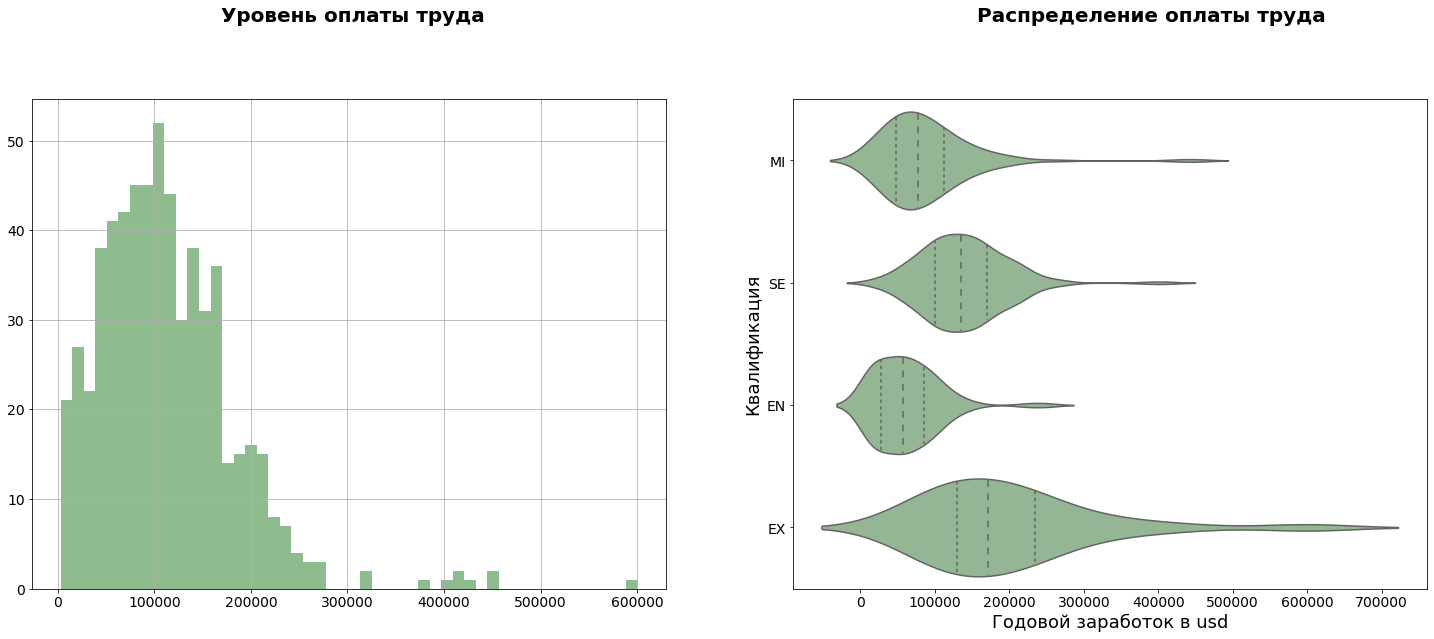

In [12]:
f, ax = plt.subplots(1, 2, figsize=(25, 9))

#salary_in_usd
ds_salaries['salary_in_usd'].hist(ax=ax[0], bins = 50, color = 'darkseagreen', density = 0)
plt.figtext(0.23, 1, 'Уровень оплаты труда', size=20, color='black', fontweight='bold')
plt.ylabel('Квалификация', size=18)
plt.xlabel('Годовой заработок в usd', size=18)


#experience_level=salary_in_usd
sns.violinplot(data = ds_salaries, x = 'salary_in_usd', y = 'experience_level', color='darkseagreen', scale='width', inner='quartile')
plt.figtext(0.65, 1, 'Распределение оплаты труда', size=20, color='black', fontweight='bold')
plt.ylabel('Квалификация', size=18)
plt.xlabel('Годовой заработок в usd', size=18)



В среднем, начинающий специалист по DS может расчитывать на заработок от 20.000$ в год.


Учитывая повышение уровня компетенций, средний уровень дохода может возрасти до 150.000$ в год.

([<matplotlib.patches.Wedge at 0x7f5a7ebfd510>,
 [Text(-1.01269125323243, -0.42948390613215126, '100'),
  Text(1.0931967774903706, -0.12215074983261182, '0'),
  Text(0.5392831522442956, 0.9587354597100579, '50')],
 [Text(-0.552377047217689, -0.2342639487993552, '62.8%'),
  Text(0.5962891513583839, -0.06662768172687916, '20.9%'),
  Text(0.2941544466787066, 0.5229466143873043, '16.3%')])

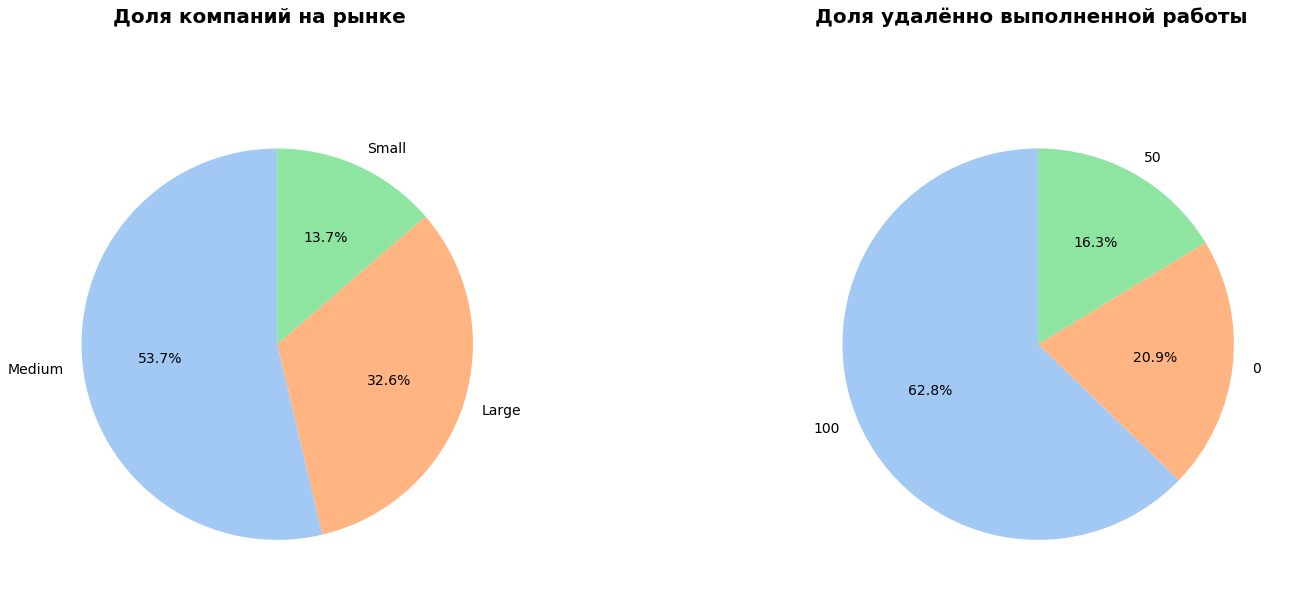

In [21]:
f = plt.figure(figsize=(25, 9))
gs = f.add_gridspec(1, 2)
ax = [f.add_subplot(gs[:,:1]), f.add_subplot(gs[:,1:])]

#company_size
df_fig = ds_salaries.sort_values('company_size', ascending=False)

c_s = df_fig['company_size'].value_counts()
plt.figtext(0.21, 1, 'Доля компаний на рынке', size=20, color='black', fontweight='bold')
labels = [c_s.index[0], c_s.index[1], c_s.index[2]]
colors = sns.color_palette('pastel')[0:4]

ax[0].pie(c_s, labels=labels, autopct='%1.1f%%', colors = colors, startangle=90)

#remote_ratio
df_figs = ds_salaries.sort_values('remote_ratio', ascending=False)
df_figs = df_figs['remote_ratio'].value_counts()
plt.figtext(0.6, 1, 'Доля удалённо выполненной работы', size=20, color='black', fontweight='bold')
labels =[df_figs.index[0], df_figs.index[1], df_figs.index[2]]

ax[1].pie(df_figs, labels=labels, autopct='%1.1f%%', colors = colors, startangle=90)

Больше половины компаний, по колиичеству сотрудников относятся к средним.


Наблюдение можно объяснить тем, что в IT компаниях штат сотрудников меньше, чем в других бизнесах.


Следовательно, DS специалисты в большинстве случаев - работники IT компаний, 


возможно, предоставляющих услуги аутсорса для крупных и маленьких компаний.


Большинство компаний предполагают возможность удалённой или частично удалённой работы.

###### Таким образом мы проанализировали рынок труда для DS специалистов. 

###### Разобрали возможные перспективы и условия труда.